In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


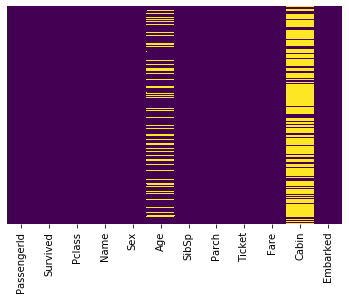

In [4]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

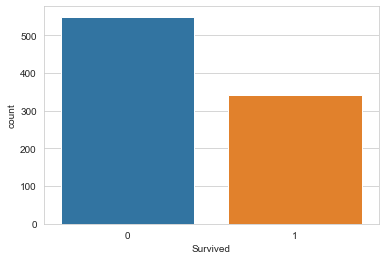

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic)

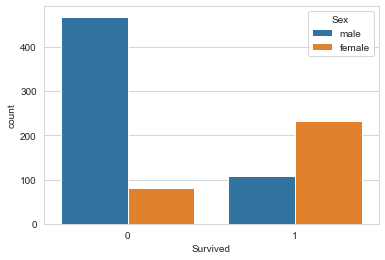

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic)

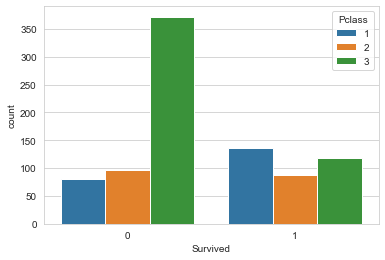

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic)

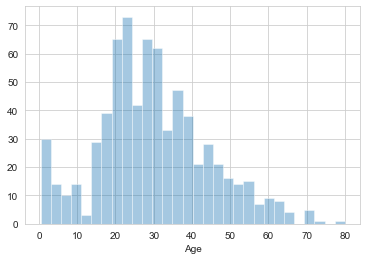

In [8]:
sns.distplot(titanic['Age'].dropna(), kde=False, bins=30)

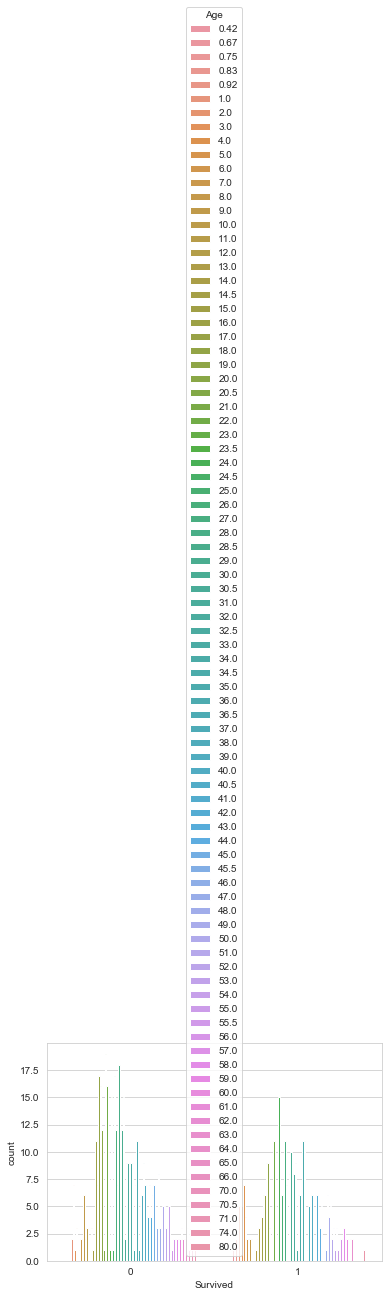

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Age', data=titanic)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


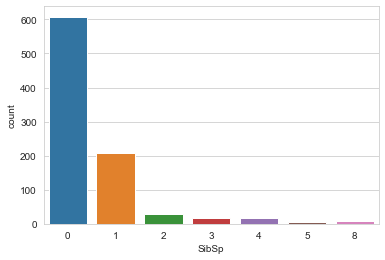

In [10]:
sns.countplot(x='SibSp', data= titanic)

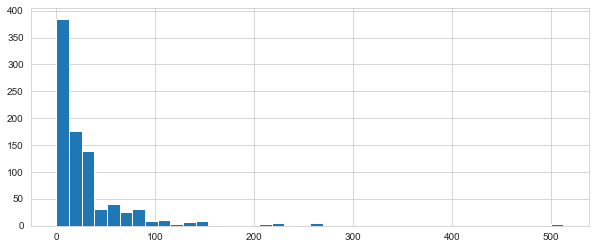

In [11]:
titanic['Fare'].hist(bins=40, figsize=(10,4))

### Missing data handle

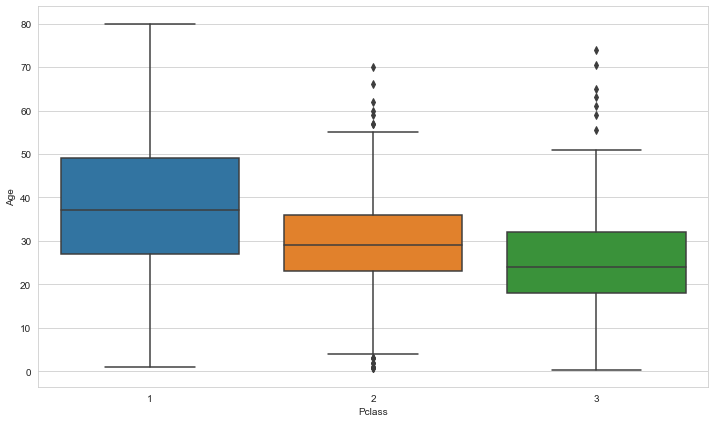

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y= 'Age', data=titanic)

In [13]:
def compute_age(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24

titanic['Age'] = titanic[['Age', 'Pclass']].apply(compute_age, axis=1)

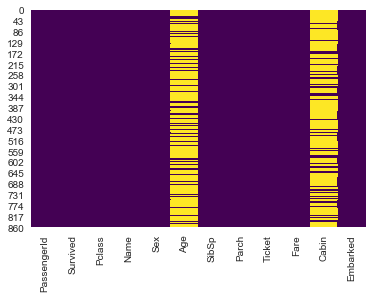

In [14]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [15]:
#Missing value is cabin

titanic.drop('Cabin', axis=1, inplace=True)

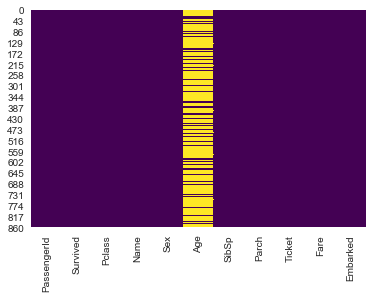

In [16]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [17]:
titanic.dropna(inplace=True)

In [18]:
sex = pd.get_dummies(titanic['Sex'], drop_first= True)

In [19]:
embarked = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [20]:
titanic=pd.concat([titanic, sex, embarked], axis=1)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,1,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,C,0,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,C,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,Q,0,1,0


In [22]:
titanic.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1,inplace=True)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,6,0,3,24.0,0,0,8.4583,1,1,0
17,18,1,2,29.0,0,0,13.0000,1,0,1
19,20,1,3,24.0,0,0,7.2250,0,0,0
26,27,0,3,24.0,0,0,7.2250,1,0,0
28,29,1,3,24.0,0,0,7.8792,0,1,0


In [24]:
titanic.drop('PassengerId', axis=1, inplace=True)

In [25]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,0,3,24.0,0,0,8.4583,1,1,0
17,1,2,29.0,0,0,13.0000,1,0,1
19,1,3,24.0,0,0,7.2250,0,0,0
26,0,3,24.0,0,0,7.2250,1,0,0
28,1,3,24.0,0,0,7.8792,0,1,0


### Build the logistic model

In [26]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train, y_train)

C:\Users\Jyotiprakash Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
prediction = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.80      0.62      0.70        13

    accuracy                           0.87        54
   macro avg       0.84      0.78      0.81        54
weighted avg       0.87      0.87      0.86        54



In [35]:
print(confusion_matrix(y_test, prediction))

[[39  2]
 [ 5  8]]
